In [1]:
import pandas as pd
import os

In [20]:
# For Cancer
cancer_path = 'ROI_JPG/ROI/Cancer'
cancer_list = []
for (path, dir, files) in os.walk(cancer_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            cancer_list.append(filePath)

In [28]:
# For Normal
normal_list = []
for i in range(len(range(10))):
    normal_path = 'ROI_JPG/ROI/Normal'.format(i)
    for (path, dir, files) in os.walk(normal_path):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext == '.jpg':
                filePath = "{0}/{1}".format(path, filename)
                # print(filePath)
                normal_list.append(filePath)

In [22]:
# Create Data Frame
# Cancer = 1
cancer_df = pd.DataFrame(data={'filename': cancer_list, 'label': [1 for i in range(len(cancer_list))]})

In [31]:
# Create Data Frame
# Normal = 0
normal_df = pd.DataFrame(data={'filename': normal_list, 'label': [0 for i in range(len(normal_list))]})

In [32]:
len(normal_df)

980

In [10]:
# Transcope (Warning: Please only one run)
from PIL import Image

trans_target = normal_df

root_path = 'ROI_JPG/Normal/'
trans_list = []

for filename in trans_target['filename']:
    non_ext = os.path.splitext(filename)[0]
    o_filename = os.path.split(non_ext)[-1]
    
    # Read Original Image
    origin = Image.open(filename)
    
    # TOP_BOTTOM
    trans = origin.transpose(Image.FLIP_TOP_BOTTOM)
    m_filename = root_path + o_filename + '-{0}'.format('TB_TRANS.jpg')
    trans.save(m_filename)
    trans_list.append(m_filename)
    
    # LEFT_RIGHT
    trans = origin.transpose(Image.FLIP_LEFT_RIGHT)
    m_filename = root_path + o_filename + '-{0}'.format('LR_TRANS.jpg')
    trans.save(m_filename)
    trans_list.append(m_filename)
    
tmp_df = pd.DataFrame({'filename': trans_list, 'label': [0 for i in range(len(trans_list))]})
normal_df = normal_df.append(tmp_df)

In [ ]:
# Rotate (Warning: Please only one run)

rotate_target = normal_df

root_path = 'ROI_JPG/Normal/'
rotate_list = []

for filename in rotate_target['filename']:
    
    # Load basename
    non_ext = os.path.splitext(filename)[0]
    o_filename = os.path.split(non_ext)[-1]
    
    # Read Original Image
    origin = Image.open(filename)
    
    # 90"
    rot = origin.rotate(90, expand=1)
    m_filename = root_path + o_filename + '-{0}'.format('90.jpg')

    rot.save(m_filename)
    rotate_list.append(m_filename)
    
    # 180"
    rot = origin.rotate(180, expand=1)
    m_filename = root_path + o_filename + '-{0}'.format('180.jpg')
    
    rot.save(m_filename)
    rotate_list.append(m_filename)
    
    # 270"
    rot = origin.rotate(-90, expand=1)
    m_filename = root_path + o_filename + '-{0}'.format('270.jpg')
    
    rot.save(m_filename)
    rotate_list.append(m_filename)
    
tmp_df = pd.DataFrame({'filename': rotate_list, 'label': [0 for i in range(len(rotate_list))]})
normal_df = normal_df.append(tmp_df)

In [6]:
# Merge ImageList
roi_img_df = cancer_df.append(normal_df)

# Shuffle
sh_df = roi_img_df.sample(frac=1).reset_index(drop=True)

In [7]:
from matplotlib.image import imread

im_list = []

# Read Image
for path in sh_df['filename']:
    img = imread(path)
    im_list.append(img)

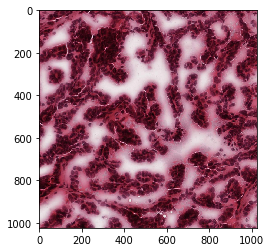

In [103]:
import matplotlib.pyplot as plt

def showImage(img):
    plt.imshow(img)
    plt.show()

# Draw Image
showImage(im_list[505])

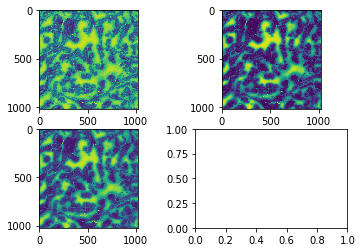

In [9]:
# Seperate Color Image View
def showImages(input_img):
    f, axarr = plt.subplots(2,2)

    axarr[0,0].imshow(input_img[...,0]) # R
    axarr[0,1].imshow(input_img[...,1]) # G
    axarr[1,0].imshow(input_img[...,2]) # B
    
    return

showImages(im_list[505])

In [10]:
# Visualization
def visualize_data(cancer_images, normal_images):
    # INPUTS
    # positive_images - Images where the label = 1 (True)
    # negative_images - Images where the label = 0 (False)
 
    figure = plt.figure()
    count = 0
 
    for i in range(cancer_images.shape[0]):
        count += 1
        figure.add_subplot(2, cancer_images.shape[0], count)
        plt.imshow(cancer_images[i, :, :])
        plt.axis('off')
        plt.title("C".format(i))
 
        figure.add_subplot(1, normal_images.shape[0], count)
        plt.imshow(normal_images[i, :, :])
        plt.axis('off')
        plt.title("N".format(i), y=-0.3)
        
    plt.show()

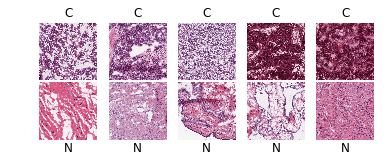

In [11]:
import numpy as np

x = np.array(im_list)
y = np.array(sh_df['label'])

# Number of positive and negative examples to show
N_TO_VISUALIZE = 5
 
# Select the first N Cancer examples
positive_example_indices = (y == 1)
positive_examples = x[positive_example_indices, :, :]
positive_examples = positive_examples[0:N_TO_VISUALIZE, :, :]
 
# Select the first N Normal examples
negative_example_indices = (y == 0)
negative_examples = x[negative_example_indices, :, :]
negative_examples = negative_examples[0:N_TO_VISUALIZE, :, :]
 
# Call the visualization function
visualize_data(positive_examples, negative_examples)

In [12]:
from PIL import Image

# Resize Image
train = []

for img in x:
    arr = Image.fromarray(img)
    res = arr.resize((128, 128))
    train.append(np.array(res))
    
train = np.array(train)

In [13]:
from sklearn.model_selection import train_test_split

# Split Data
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [14]:
# Generalize
x_train = x_train / 255
x_test = x_test / 255

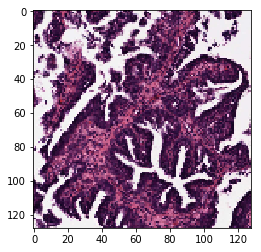

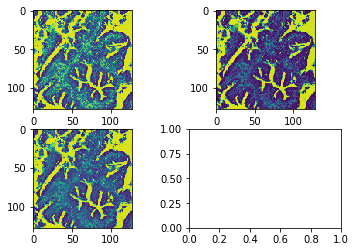

In [100]:
# x_train[,100:200,100:200,]

showImage(x_test[20])
showImages(x_test[20])

In [16]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
y_train = to_categorical(y_train,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.optimizers import Adadelta
from keras.backend import get_session

In [19]:
def cnn(size):
    KERNEL = (8,8)
    shape = (size[0], size[1], size[2])
    
    # Define Model
    model = Sequential()
    
    # Add Convolution 1
    model.add(Conv2D(filters=32, kernel_size=KERNEL, activation='relu', input_shape=shape))
    
    # Add Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # Add Convolution 2
    model.add(Conv2D(filters=64, kernel_size=KERNEL, activation='relu', input_shape=shape))
    
    # Add Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # Add Convolution 3
    model.add(Conv2D(filters=128, kernel_size=KERNEL, activation='relu', input_shape=shape))
    
    # Add Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    
    # Add Output Layer
    model.add(Dropout(0.5))
    model.add(Dense(units=2, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
    model.summary()
    
    return model

model = cnn(size=x_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 121, 121, 32)      6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        131136    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       524416    
__________

In [20]:
x_train.shape[1:]

(128, 128, 3)

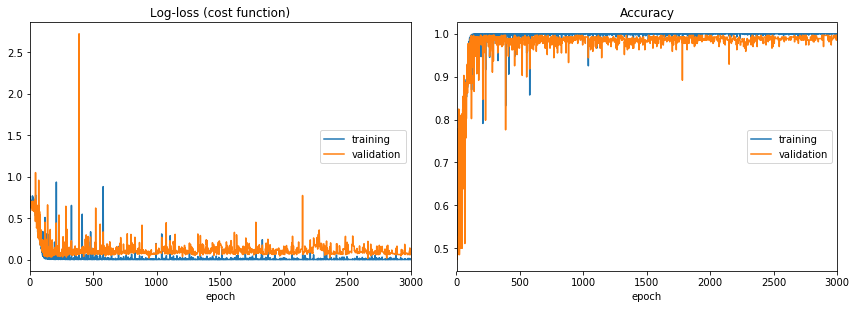

Log-loss (cost function):
training   (min:    0.000, max:    1.536, cur:    0.000)
validation (min:    0.015, max:    2.721, cur:    0.060)

Accuracy:
training   (min:    0.500, max:    1.000, cur:    1.000)
validation (min:    0.474, max:    0.996, cur:    0.996)


In [21]:
from livelossplot.keras import PlotLossesCallback

hist = model.fit(x_train, y_train, epochs=3000, batch_size=128, validation_split=0.2, callbacks=[PlotLossesCallback()], verbose=0)

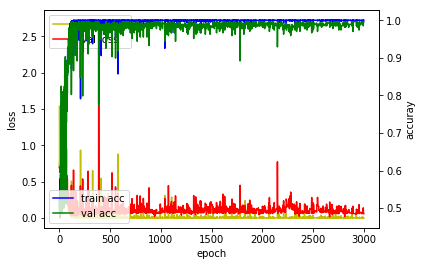

In [22]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

fig = plt.gcf()
plt.show()
fig.savefig('result-2.png')

In [75]:
# 테스트 데이터로 평가하기
score = model.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

336/336 [==============================] - 0s 464us/step
loss= 0.250265724093732
accuracy= 0.9791666666666666


In [61]:
from sklearn.metrics import roc_auc_score, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = model.predict_proba(x_test)
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [62]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

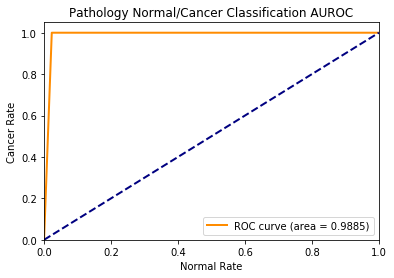

In [99]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Normal Rate')
plt.ylabel('Cancer Rate')
plt.title('Pathology Normal/Cancer Classification AUROC')
plt.legend(loc="lower right")

fig = plt.gcf()
plt.show()
fig.savefig('AUROC.png')